In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from numpy import mean
from numpy import std
import seaborn as sns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 50)



In [2]:
data = pd.read_csv("Citywide_Payroll_Data__Fiscal_Year_.csv")

/Users/mariumsultan/anaconda2/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2714: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
#numbers are int or float
data.dtypes

Fiscal Year                     int64
Payroll Number                float64
Agency Name                    object
Last Name                      object
First Name                     object
Mid Init                       object
Agency Start Date              object
Work Location Borough          object
Title Description              object
Leave Status as of June 30     object
Base Salary                   float64
Pay Basis                      object
Regular Hours                 float64
Regular Gross Paid            float64
OT Hours                      float64
Total OT Paid                 float64
Total Other Pay               float64
dtype: object

In [4]:
len(data)

3333080

In [5]:
#cleaning out negative numbers
data = data[data['Regular Gross Paid'] >= 0]
data = data[data['Total OT Paid'] >= 0]
data = data[data['Total Other Pay'] >= 0]
data = data[data['Regular Hours'] >= 0]
data = data[data['OT Hours'] >= 0]

In [6]:
len(data)

3311899

In [7]:
#calculate total pay and calculate total hours
data['total_pay_all'] = data['Regular Gross Paid']+data['Total OT Paid']+data['Total Other Pay']
data['total_hours'] = data['Regular Hours']+data['OT Hours']

In [8]:
export_csv = data.to_csv('payment.csv')

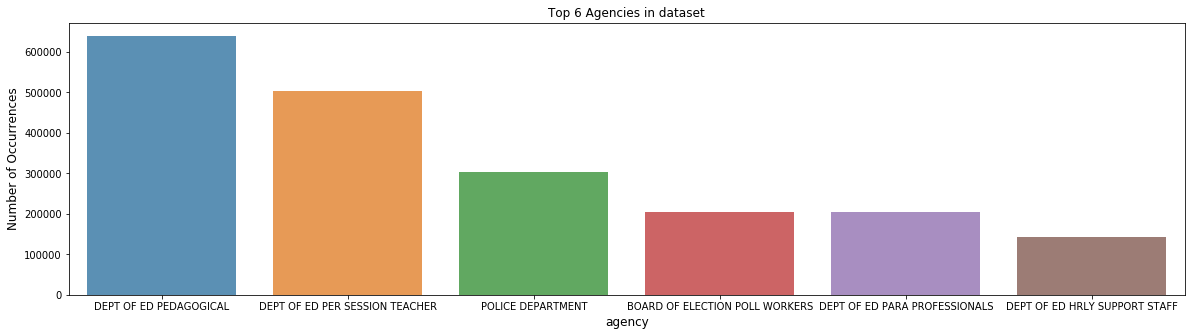

In [9]:
a_count  = data['Agency Name'].value_counts()
a_count = a_count[:6,]
plt.figure(figsize=(20,5))
sns.barplot(a_count.index, a_count.values, alpha=0.8)
plt.title('Top 6 Agencies in dataset')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('agency', fontsize=12)
plt.show()

In [10]:
data.sort_values(by=['total_pay_all'], ascending= False).head()

,Fiscal Year,Payroll Number,Agency Name,Last Name,First Name,Mid Init,Agency Start Date,Work Location Borough,Title Description,Leave Status as of June 30,Base Salary,Pay Basis,Regular Hours,Regular Gross Paid,OT Hours,Total OT Paid,Total Other Pay,total_pay_all,total_hours
192014,2016,NaN,DEPARTMENT OF TRANSPORTATION,TIPALDO,JOHN,M,01/09/1984,QUEENS,ADMINISTRATIVE ENGINEER,ACTIVE,176702.00,per Annum,1830.00,672308.86,0.00,0.00,422.40,672731.26,1830.00
59528,2016,NaN,POLICE DEPARTMENT,SCHOOLCRAFT,ADRIAN,P,07/01/2002,MANHATTAN,POLICE OFFICER,CEASED,78026.00,per Annum,240.00,487277.63,0.00,52571.02,100355.84,640204.49,240.00
1505855,2014,816.0,DEPT OF HEALTH/MENTAL HYGIENE,FRANKLIN,DOLORES,M,07/07/2003,NaN,"DIRECTOR, MEDICAL AFFAIRS",CEASED,144772.00,per Annum,0.00,541544.90,0.00,0.00,0.00,541544.90,0.00
2611276,2018,826.0,DEPT OF ENVIRONMENT PROTECTION,PATEL,BHAVESH,N,06/06/1994,RICHMOND,STATIONARY ENGINEER,ACTIVE,467.20,per Day,2085.72,234407.25,1960.25,237389.73,67301.34,539098.32,4045.97
2611280,2018,826.0,DEPT OF ENVIRONMENT PROTECTION,LAUDANDO,CHRISTOPHER,NaN,04/26/1993,BROOKLYN,SENIOR STATIONARY ENGINEER,ACTIVE,575.52,per Day,2045.72,362522.47,767.50,153226.04,563.00,516311.51,2813.22


In [11]:
total_pay_mean_agency = data.groupby('Agency Name', as_index=False)['total_pay_all'].mean().sort_values(by='total_pay_all', ascending=False).head()

In [12]:
total_pay_mean_agency

,Agency Name,total_pay_all
15,BRONX COMMUNITY BOARD #3,105596.805000
92,FINANCIAL INFO SVCS AGENCY,97908.828786
93,FIRE DEPARTMENT,96767.444404
10,BRONX COMMUNITY BOARD #1,96342.860769
90,DOE CUSTODIAL PAYROL,93224.258346


In [13]:
data['Fiscal Year'].value_counts()

2019    588299
2015    574497
2017    558541
2018    542818
2016    541154
2014    506590
Name: Fiscal Year, dtype: int64

In [14]:
data2019= data[data['Fiscal Year'] == 2019]
data2017 = data[data['Fiscal Year'] == 2017]
data2015 = data[data['Fiscal Year'] == 2015]

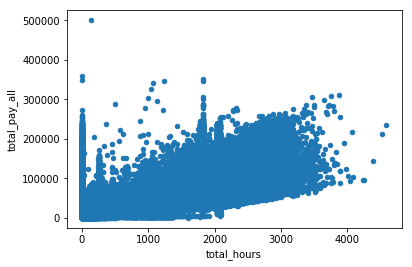

In [15]:
ax= data2019.plot.scatter(x='total_hours', y='total_pay_all')

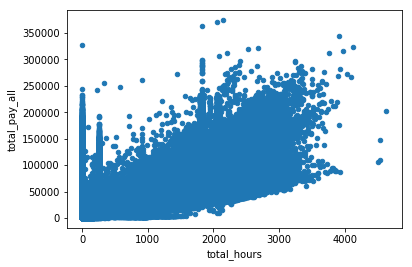

In [16]:
ax= data2017.plot.scatter(x='total_hours', y='total_pay_all')

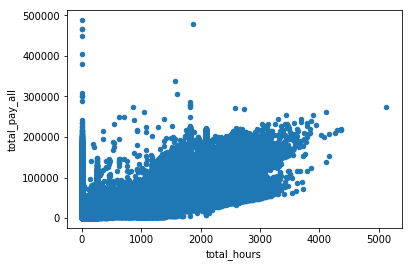

In [17]:
ax= data2015.plot.scatter(x='total_hours', y='total_pay_all')

##Zero Hours

In [18]:
#let's look at records with 0 hours, and pay being above 0
zero_hours2019= data2019[data2019['total_hours']==0]
zero_hours2019= zero_hours2019[zero_hours2019['total_pay_all']>0]

In [19]:
len(zero_hours2019)

341428

In [20]:
#no one in DEPT OF ED PEDAGOGICAL, DEPT OF ED PER SESSION TEACHER, DEPT OF ED PARA PROFESSIONALS is reporting hours

In [21]:
doe2019 = data2019[data2019['Agency Name'].str.contains("OF ED")]
doe2017 = data2017[data2017['Agency Name'].str.contains("OF ED")]

In [22]:
doe2019.describe()

,Fiscal Year,Payroll Number,Base Salary,Regular Hours,Regular Gross Paid,OT Hours,Total OT Paid,Total Other Pay,total_pay_all,total_hours
count,308077.0,308077.000000,308077.000000,308077.000000,308077.000000,308077.000000,308077.000000,308077.000000,308077.000000,308077.000000
mean,2019.0,744.232977,40879.336066,75.560773,41491.592318,1.320132,94.193597,132.648209,41718.434125,76.880905
std,0.0,2.352295,45739.625381,349.892425,45162.412830,18.063792,1173.110983,1071.755256,45323.900981,356.660271
min,2019.0,740.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.010000,0.000000
25%,2019.0,742.000000,33.180000,0.000000,2589.600000,0.000000,0.000000,0.000000,2595.400000,0.000000
50%,2019.0,744.000000,26946.000000,0.000000,22693.780000,0.000000,0.000000,0.000000,22730.070000,0.000000
75%,2019.0,747.000000,83924.000000,0.000000,74294.710000,0.000000,0.000000,0.000000,75329.920000,0.000000
max,2019.0,747.000000,352763.000000,2085.720000,357973.230000,1316.000000,68898.330000,52382.830000,357973.230000,3401.720000


In [23]:
non0_hours_doe2019= doe2019[doe2019['total_hours']>0]
non0_hours_doe2017 = doe2017[doe2017['total_hours']>0]

In [24]:
len(non0_hours_doe2019)

15997

In [25]:
non0_hours_doe2019['Agency Name'].value_counts()

DEPARTMENT OF EDUCATION ADMIN    15997
Name: Agency Name, dtype: int64

In [26]:
non0_hours_doe2017['Agency Name'].value_counts()

DEPARTMENT OF EDUCATION ADMIN    15309
Name: Agency Name, dtype: int64

In [27]:
#only doe admin are reporting any hours

In [28]:
zero_hours2019['Agency Name'].value_counts()

DEPT OF ED PEDAGOGICAL            111429
DEPT OF ED PER SESSION TEACHER    104676
DEPT OF ED PARA PROFESSIONALS      40948
BOARD OF ELECTION POLL WORKERS     37004
DEPT OF ED HRLY SUPPORT STAFF      22677
DEPT OF ED PER DIEM TEACHERS       11886
DEPT OF PARKS & RECREATION          2346
POLICE DEPARTMENT                   1321
DOE CUSTODIAL PAYROL                1318
COMMUNITY COLLEGE (MANHATTAN)        633
DEPT OF HEALTH/MENTAL HYGIENE        582
NYC HOUSING AUTHORITY                522
DEPT OF ENVIRONMENT PROTECTION       522
HRA/DEPT OF SOCIAL SERVICES          510
DEPARTMENT OF EDUCATION ADMIN        464
ADMIN FOR CHILDREN'S SVCS            428
DISTRICT ATTORNEY-MANHATTAN          343
COMMUNITY COLLEGE (LAGUARDIA)        313
COMMUNITY COLLEGE (QUEENSBORO)       310
DEPARTMENT OF SANITATION             304
DEPARTMENT OF TRANSPORTATION         290
DEPARTMENT OF CORRECTION             220
FIRE DEPARTMENT                      184
DEPT. OF HOMELESS SERVICES           133
HOUSING PRESERVA

In [29]:
data2019['Agency Name'].value_counts().head

<bound method Series.head of DEPT OF ED PEDAGOGICAL            111429
DEPT OF ED PER SESSION TEACHER    104676
POLICE DEPARTMENT                  59258
DEPT OF ED PARA PROFESSIONALS      40948
BOARD OF ELECTION POLL WORKERS     37004
DEPT OF ED HRLY SUPPORT STAFF      22677
FIRE DEPARTMENT                    17370
DEPT OF PARKS & RECREATION         16964
DEPARTMENT OF EDUCATION ADMIN      16461
HRA/DEPT OF SOCIAL SERVICES        14314
DEPARTMENT OF CORRECTION           13497
NYC HOUSING AUTHORITY              12981
DEPT OF ED PER DIEM TEACHERS       11886
DEPARTMENT OF SANITATION           11864
DEPT OF HEALTH/MENTAL HYGIENE       8631
ADMIN FOR CHILDREN'S SVCS           8450
DEPT OF ENVIRONMENT PROTECTION      7319
DEPARTMENT OF TRANSPORTATION        6511
COMMUNITY COLLEGE (MANHATTAN)       5808
COMMUNITY COLLEGE (LAGUARDIA)       4263
COMMUNITY COLLEGE (KINGSBORO)       3666
COMMUNITY COLLEGE (QUEENSBORO)      3440
COMMUNITY COLLEGE (BRONX)           3106
DEPT OF CITYWIDE ADMIN SVCS 

In [30]:
#are these only people who are not active? - no

In [31]:
zero_hours_active2019= zero_hours2019[zero_hours2019['Leave Status as of June 30']=='ACTIVE']
len(zero_hours_active2019)

280669

In [32]:
#Salaries ‘gone wild’: Carranza cronies pocket pay hikes as high as 35%
#https://nypost.com/2019/08/17/salaries-gone-wild-carranza-cronies-pocket-pay-hikes-as-high-as-35/

In [33]:
data2017.sort_values(by='total_pay_all', ascending=False).head(5)

,Fiscal Year,Payroll Number,Agency Name,Last Name,First Name,Mid Init,Agency Start Date,Work Location Borough,Title Description,Leave Status as of June 30,Base Salary,Pay Basis,Regular Hours,Regular Gross Paid,OT Hours,Total OT Paid,Total Other Pay,total_pay_all,total_hours
1728401,2017,NaN,DEPARTMENT OF CORRECTION,GRABOWSKI,GREGORY,G,06/01/2000,QUEENS,CORRECTION OFFICER,ACTIVE,82808.00,per Annum,2085.72,334891.10,60.55,1585.68,37427.32,373904.10,2146.27
2173568,2017,NaN,POLICE DEPARTMENT,OBYRNE,BRIAN,M,07/01/2004,MANHATTAN,POLICE OFFICER,ACTIVE,85292.00,per Annum,2051.43,325867.35,7.82,531.69,44982.36,371381.40,2059.25
2122095,2017,NaN,OFFICE OF THE COMPTROLLER,EVANS,SCOTT,C,07/14/2014,MANHATTAN,PENSION INVESTMENT ADVISOR,ACTIVE,350000.00,per Annum,1825.00,362416.04,0.00,0.00,0.00,362416.04,1825.00
1732687,2017,NaN,DEPARTMENT OF CORRECTION,O'DONOGHUE,FINTAN,NaN,05/30/2000,QUEENS,SENIOR STATIONARY ENGINEER,ACTIVE,555.92,per Day,2085.72,149947.48,1823.25,191488.15,3335.52,344771.15,3908.97
1928065,2017,NaN,DEPT OF ED PEDAGOGICAL,SUKER,DAVID,P,09/08/1998,MANHATTAN,TEACHER,ACTIVE,98458.00,per Annum,0.00,326609.68,0.00,0.00,38.04,326647.72,0.00


In [34]:
data2017.sort_values(by='total_pay_all', ascending=False).head(20)['Agency Name'].value_counts()

DEPARTMENT OF CORRECTION          7
COMMUNITY COLLEGE (QUEENSBORO)    2
COMMUNITY COLLEGE (MANHATTAN)     2
COMMUNITY COLLEGE (BRONX)         2
OFFICE OF THE ACTUARY             1
DEPARTMENT OF SANITATION          1
POLICE DEPARTMENT                 1
OFFICE OF THE COMPTROLLER         1
COMMUNITY COLLEGE (KINGSBORO)     1
DEPT OF ED PEDAGOGICAL            1
COMMUNITY COLLEGE (HOSTOS)        1
Name: Agency Name, dtype: int64

In [35]:
data2019.sort_values(by='total_pay_all', ascending=False).head(20)['Agency Name'].value_counts()

DEPARTMENT OF CORRECTION          7
DEPT OF HEALTH/MENTAL HYGIENE     2
FIRE DEPARTMENT                   2
COMMUNITY COLLEGE (QUEENSBORO)    1
GUTTMAN COMMUNITY COLLEGE         1
OFFICE OF THE ACTUARY             1
COMMUNITY COLLEGE (MANHATTAN)     1
DEPT OF ED PEDAGOGICAL            1
NYC HOUSING AUTHORITY             1
OFFICE OF THE COMPTROLLER         1
DEPT OF CITYWIDE ADMIN SVCS       1
COMMUNITY COLLEGE (LAGUARDIA)     1
Name: Agency Name, dtype: int64

In [36]:
#who are the higest earning in doe

In [37]:
top15_2019 = doe2019.sort_values(by='total_pay_all', ascending=False).head(15)


In [38]:
#no overlap in lists

In [39]:
#at least 36 executives now slated to rake in more than $200,000 per year — up from 21 last fiscal year
#https://nypost.com/2019/08/17/salaries-gone-wild-carranza-cronies-pocket-pay-hikes-as-high-as-35/

In [40]:
print len((doe2019[doe2019['Base Salary']>200000]))
print len((doe2017[doe2017['Base Salary']>200000]))

51
23


In [41]:
#the amount of people in the doe, with all types of pay combined, who make more than 200000 has gone up to 354 from 51

In [42]:
print len((doe2019[doe2019['total_pay_all']>200000]))
print len((doe2017[doe2017['total_pay_all']>200000]))

354
51


In [43]:
doe2019[doe2019['total_pay_all']>200000].head()

,Fiscal Year,Payroll Number,Agency Name,Last Name,First Name,Mid Init,Agency Start Date,Work Location Borough,Title Description,Leave Status as of June 30,Base Salary,Pay Basis,Regular Hours,Regular Gross Paid,OT Hours,Total OT Paid,Total Other Pay,total_pay_all,total_hours
2876212,2019,740.0,DEPARTMENT OF EDUCATION ADMIN,GRANT,SHIRLEY,NaN,09/20/1988,MANHATTAN,DISTRICT MANAGER OF ADMINISTRATION AND BUSINES...,CEASED,94957.0,per Annum,945.0,278965.99,0.0,0.0,140.25,279106.24,945.0
2876213,2019,740.0,DEPARTMENT OF EDUCATION ADMIN,COLEMAN,ANASTASIA,NaN,03/29/2018,MANHATTAN,SPECIAL COMMISSIONER OF INVESTIGATION-NYC SCHO...,ACTIVE,223142.0,per Annum,1223.0,273676.72,0.0,0.0,0.00,273676.72,1223.0
2876214,2019,740.0,DEPARTMENT OF EDUCATION ADMIN,MILLER,DANIEL,NaN,08/02/2004,MANHATTAN,DEPUTY EXECUTIVE DIRECTOR,ACTIVE,255000.0,per Annum,1825.0,246109.87,0.0,0.0,125.00,246234.87,1825.0
2876215,2019,740.0,DEPARTMENT OF EDUCATION ADMIN,WATSON,CHERYL,L,09/01/1987,MANHATTAN,EDUCATIONAL MANAGEMENT ASSOCIATE,ACTIVE,234080.0,per Annum,1825.0,234531.05,0.0,0.0,0.00,234531.05,1825.0
2876216,2019,740.0,DEPARTMENT OF EDUCATION ADMIN,RICH,SANFORD,R,01/25/2016,MANHATTAN,EXECUTIVE DIRECTOR,ACTIVE,228737.0,per Annum,1825.0,230122.14,0.0,0.0,500.00,230622.14,1825.0


In [44]:
doe2017[doe2017['total_pay_all']>200000].head()

,Fiscal Year,Payroll Number,Agency Name,Last Name,First Name,Mid Init,Agency Start Date,Work Location Borough,Title Description,Leave Status as of June 30,Base Salary,Pay Basis,Regular Hours,Regular Gross Paid,OT Hours,Total OT Paid,Total Other Pay,total_pay_all,total_hours
1738708,2017,NaN,DEPARTMENT OF EDUCATION ADMIN,BECKER,LAWRENCE,NaN,11/19/1979,BROOKLYN,*ADMINISTRATIVE ATTORNEY,ACTIVE,212561.0,per Annum,1825.0,218728.32,0.0,0.0,0.0,218728.32,1825.0
1738866,2017,NaN,DEPARTMENT OF EDUCATION ADMIN,BERNSTEIN,VICKI,NaN,01/17/1996,BROOKLYN,ADMINISTRATIVE STAFF ANALYST,ACTIVE,207563.0,per Annum,1825.0,213585.26,0.0,0.0,0.0,213585.26,1825.0
1739196,2017,NaN,DEPARTMENT OF EDUCATION ADMIN,BRAWER,SANDY,NaN,02/22/1988,MANHATTAN,ADMINISTRATIVE EDUCATION ANALYST,ACTIVE,200542.0,per Annum,1825.0,206360.63,0.0,0.0,0.0,206360.63,1825.0
1742933,2017,NaN,DEPARTMENT OF EDUCATION ADMIN,GOLDSTEIN,ERIC,NaN,07/07/2003,MANHATTAN,EDUCATIONAL MANAGEMENT ASSOCIATE,ACTIVE,211978.0,per Annum,1825.0,218128.44,0.0,0.0,0.0,218128.44,1825.0
1743410,2017,NaN,DEPARTMENT OF EDUCATION ADMIN,GUZMAN,MARIANO,NaN,09/04/1974,MANHATTAN,EDUCATIONAL MANAGEMENT ASSOCIATE,ACTIVE,206283.0,per Annum,1825.0,212268.20,0.0,0.0,0.0,212268.20,1825.0


(0, 400000)

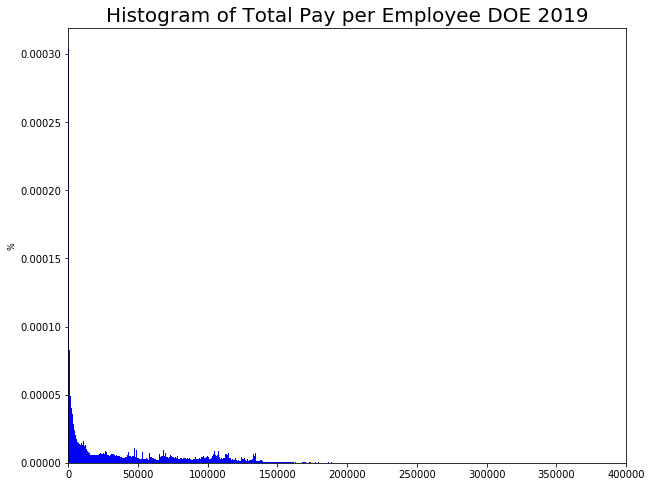

In [45]:
plt.figure(figsize=(10, 8))
plt.hist(doe2019['total_pay_all'], bins=1000, density=True, color='blue')
plt.title('Histogram of Total Pay per Employee DOE 2019', fontsize=20)
plt.ylabel('%', fontsize=8)
plt.xlim(0, 400000)

(0, 400000)

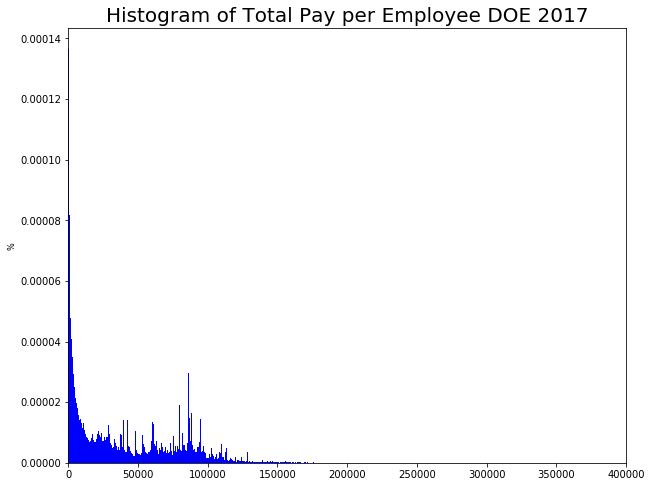

In [46]:
plt.figure(figsize=(10, 8))
plt.hist(doe2017['total_pay_all'], bins=1000, density=True, color='blue')
plt.title('Histogram of Total Pay per Employee DOE 2017', fontsize=20)
plt.ylabel('%', fontsize=8)
plt.xlim(0, 400000)

In [47]:
#only per annum employees

In [48]:
#above 25,000 a year, to remove strangely small values

In [49]:
yearly_doe2019= doe2019[doe2019['Pay Basis']=='per Annum']

yearly_doe2017= doe2017[doe2017['Pay Basis']=='per Annum']



In [50]:
len(yearly_doe2019) - len(yearly_doe2017)

12161

In [51]:
#added 12161 salaried empolyees

In [52]:
#above 25,000 a year, to remove strangely small values
yearly_doe2019= doe2019[doe2019['total_pay_all']>25000]
yearly_doe2017= doe2017[doe2017['total_pay_all']>25000]


In [53]:
len(yearly_doe2019)

149491

In [54]:
len(yearly_doe2017)

139783

In [55]:
#yearly total pay mean has gone up 9761 (for total pay above 25000 a year)
#yearly base salary mean has gone up 3520(for total pay above 25000 a year)

In [56]:
top15_2019 = yearly_doe2019.sort_values(by='total_pay_all', ascending=False).head(500)
b15_2019 = yearly_doe2019.sort_values(by='total_pay_all', ascending=False).tail(500)

top15_2017= yearly_doe2017.sort_values(by='total_pay_all', ascending=False).head(500)
b15_2017 = yearly_doe2017.sort_values(by='total_pay_all', ascending=False).tail(500)
print '2019 top and bottom mean (starting at 25000)'
print 'top 500 mean'
print top15_2019['total_pay_all'].mean()
print 'bottom 500 mean'
print b15_2019['total_pay_all'].mean()

print '2017 top and bottom mean (starting at 25000)'
print 'top 500 mean'
print top15_2017['total_pay_all'].mean()
print 'bottom 500 mean'
print b15_2017['total_pay_all'].mean()

print 'delta bottom mean'
print (b15_2019['total_pay_all'].mean() - b15_2017['total_pay_all'].mean())

print 'delta top mean'
print (top15_2019['total_pay_all'].mean() - top15_2017['total_pay_all'].mean())

print 'delta full set mean'
yearly_doe2019['total_pay_all'].mean()-yearly_doe2017['total_pay_all'].mean()

2019 top and bottom mean (starting at 25000)
top 500 mean
208015.24714
bottom 500 mean
25114.57598
2017 top and bottom mean (starting at 25000)
top 500 mean
181347.647
bottom 500 mean
25127.82286
delta bottom mean
-13.24688
delta top mean
26667.60014
delta full set mean


9761.274913387053

In [57]:
print '2019 top and bottom mean (starting at 25000)'

print top15_2019['total_pay_all'].median()
print b15_2019['total_pay_all'].median()


print '2017 top and bottom median (starting at 25000)'

print top15_2017['total_pay_all'].median()
print b15_2017['total_pay_all'].median()


print 'delta bottom median'
print (b15_2019['total_pay_all'].median() - b15_2017['total_pay_all'].median())

print 'delta top median'
print (top15_2019['total_pay_all'].median() - top15_2017['total_pay_all'].median())

print 'delta full set median'
yearly_doe2019['total_pay_all'].median()-yearly_doe2017['total_pay_all'].median()

2019 top and bottom mean (starting at 25000)
203814.525
25113.91
2017 top and bottom median (starting at 25000)
176571.825
25130.175
delta bottom median
-16.265
delta top median
27242.7
delta full set median


6283.509999999995

In [58]:
top15_2019['Fiscal Year'][:1]

2892771    2019
Name: Fiscal Year, dtype: int64

In [59]:
data = [['tom', 10], ['nick', 15], ['juli', 14]] 
  
# Create the pandas DataFrame 
df = pd.DataFrame(data, columns = ['Name', 'Age'])

In [60]:
top15_2019['total_pay_all'].median()

203814.525

In [61]:
(b15_2019['total_pay_all'].sum())

12557287.99

In [62]:
(b15_2017['total_pay_all'].sum())

12563911.43

In [63]:
# initialize list of lists 
datadf = [[2019, 'Top', (top15_2019['total_pay_all'].median()),  (top15_2019['total_pay_all'].mean()), (top15_2019['total_pay_all'].sum())],
        [2017, 'Top', (top15_2017['total_pay_all'].median()),  (top15_2017['total_pay_all'].mean()), (top15_2017['total_pay_all'].sum())],
           [2019, 'Bottom',  (b15_2019['total_pay_all'].median()),  (b15_2019['total_pay_all'].mean()), (b15_2019['total_pay_all'].sum())],
          [2017, 'Bottom',  (b15_2017['total_pay_all'].median()),  (b15_2017['total_pay_all'].mean()), (b15_2017['total_pay_all'].sum())],
        ['Delta Increase', 'Top', (top15_2019['total_pay_all'].median() - top15_2017['total_pay_all'].median()), (top15_2019['total_pay_all'].mean() - top15_2017['total_pay_all'].mean()), (top15_2019['total_pay_all'].sum() - top15_2017['total_pay_all'].sum()) ],
                 ['Delta Increase', 'Bottom', (b15_2019['total_pay_all'].median() - b15_2017['total_pay_all'].median()), (b15_2019['total_pay_all'].mean() - b15_2017['total_pay_all'].mean()), (b15_2019['total_pay_all'].sum() - b15_2017['total_pay_all'].sum())]]

   
# Create the pandas DataFrame 
df_in = pd.DataFrame(datadf, columns = ['Year', 'Subset', 'Median', 'Mean', 'Sum']) 

In [64]:
df_in
#for top 500 and bottom 500 earners on yearly salary, starting out at 25000

,Year,Subset,Median,Mean,Sum
0,2019,Top,203814.525,208015.24714,1.040076e+08
1,2017,Top,176571.825,181347.64700,9.067382e+07
2,2019,Bottom,25113.910,25114.57598,1.255729e+07
3,2017,Bottom,25130.175,25127.82286,1.256391e+07
4,Delta Increase,Top,27242.700,26667.60014,1.333380e+07
5,Delta Increase,Bottom,-16.265,-13.24688,-6.623440e+03


In [65]:
export_csv3 = df_in.to_csv('inequality1.csv')

In [66]:
datadf

[[2019, 'Top', 203814.525, 208015.2471399999, 104007623.57],
 [2017, 'Top', 176571.825, 181347.6469999997, 90673823.5],
 [2019, 'Bottom', 25113.91, 25114.575979999994, 12557287.99],
 [2017, 'Bottom', 25130.175, 25127.82286, 12563911.43],
 ['Delta Increase',
  'Top',
  27242.699999999983,
  26667.6001400002,
  13333800.069999993],
 ['Delta Increase',
  'Bottom',
  -16.264999999999418,
  -13.246880000006058,
  -6623.4399999994785]]

In [67]:
x3 = yearly_doe2019['Base Salary'].mean()
y3 = yearly_doe2017['Base Salary'].mean()
delta_base = x3-y3
print delta_base

x4 = yearly_doe2019['total_pay_all'].max()
y4 = yearly_doe2017['total_pay_all'].max()
delta_tot = x4-y4
print delta_tot


3520.37448555
31325.51000000001


In [68]:
#yearly pay max has gone up 31,325
#yearly base salary max has gone up 118,194

In [69]:
yearly_doe2019.head()

,Fiscal Year,Payroll Number,Agency Name,Last Name,First Name,Mid Init,Agency Start Date,Work Location Borough,Title Description,Leave Status as of June 30,Base Salary,Pay Basis,Regular Hours,Regular Gross Paid,OT Hours,Total OT Paid,Total Other Pay,total_pay_all,total_hours
2876212,2019,740.0,DEPARTMENT OF EDUCATION ADMIN,GRANT,SHIRLEY,NaN,09/20/1988,MANHATTAN,DISTRICT MANAGER OF ADMINISTRATION AND BUSINES...,CEASED,94957.0,per Annum,945.0,278965.99,0.0,0.0,140.25,279106.24,945.0
2876213,2019,740.0,DEPARTMENT OF EDUCATION ADMIN,COLEMAN,ANASTASIA,NaN,03/29/2018,MANHATTAN,SPECIAL COMMISSIONER OF INVESTIGATION-NYC SCHO...,ACTIVE,223142.0,per Annum,1223.0,273676.72,0.0,0.0,0.00,273676.72,1223.0
2876214,2019,740.0,DEPARTMENT OF EDUCATION ADMIN,MILLER,DANIEL,NaN,08/02/2004,MANHATTAN,DEPUTY EXECUTIVE DIRECTOR,ACTIVE,255000.0,per Annum,1825.0,246109.87,0.0,0.0,125.00,246234.87,1825.0
2876215,2019,740.0,DEPARTMENT OF EDUCATION ADMIN,WATSON,CHERYL,L,09/01/1987,MANHATTAN,EDUCATIONAL MANAGEMENT ASSOCIATE,ACTIVE,234080.0,per Annum,1825.0,234531.05,0.0,0.0,0.00,234531.05,1825.0
2876216,2019,740.0,DEPARTMENT OF EDUCATION ADMIN,RICH,SANFORD,R,01/25/2016,MANHATTAN,EXECUTIVE DIRECTOR,ACTIVE,228737.0,per Annum,1825.0,230122.14,0.0,0.0,500.00,230622.14,1825.0


In [70]:
print len((doe2019[doe2019['total_pay_all']>200000]))
print len((doe2017[doe2017['total_pay_all']>200000]))

354
51


In [71]:
top2019 = (doe2019[doe2019['total_pay_all']>200000])
top2017 = (doe2017[doe2017['total_pay_all']>200000])

In [72]:
top2019.head()

,Fiscal Year,Payroll Number,Agency Name,Last Name,First Name,Mid Init,Agency Start Date,Work Location Borough,Title Description,Leave Status as of June 30,Base Salary,Pay Basis,Regular Hours,Regular Gross Paid,OT Hours,Total OT Paid,Total Other Pay,total_pay_all,total_hours
2876212,2019,740.0,DEPARTMENT OF EDUCATION ADMIN,GRANT,SHIRLEY,NaN,09/20/1988,MANHATTAN,DISTRICT MANAGER OF ADMINISTRATION AND BUSINES...,CEASED,94957.0,per Annum,945.0,278965.99,0.0,0.0,140.25,279106.24,945.0
2876213,2019,740.0,DEPARTMENT OF EDUCATION ADMIN,COLEMAN,ANASTASIA,NaN,03/29/2018,MANHATTAN,SPECIAL COMMISSIONER OF INVESTIGATION-NYC SCHO...,ACTIVE,223142.0,per Annum,1223.0,273676.72,0.0,0.0,0.00,273676.72,1223.0
2876214,2019,740.0,DEPARTMENT OF EDUCATION ADMIN,MILLER,DANIEL,NaN,08/02/2004,MANHATTAN,DEPUTY EXECUTIVE DIRECTOR,ACTIVE,255000.0,per Annum,1825.0,246109.87,0.0,0.0,125.00,246234.87,1825.0
2876215,2019,740.0,DEPARTMENT OF EDUCATION ADMIN,WATSON,CHERYL,L,09/01/1987,MANHATTAN,EDUCATIONAL MANAGEMENT ASSOCIATE,ACTIVE,234080.0,per Annum,1825.0,234531.05,0.0,0.0,0.00,234531.05,1825.0
2876216,2019,740.0,DEPARTMENT OF EDUCATION ADMIN,RICH,SANFORD,R,01/25/2016,MANHATTAN,EXECUTIVE DIRECTOR,ACTIVE,228737.0,per Annum,1825.0,230122.14,0.0,0.0,500.00,230622.14,1825.0


(25000, 400000)

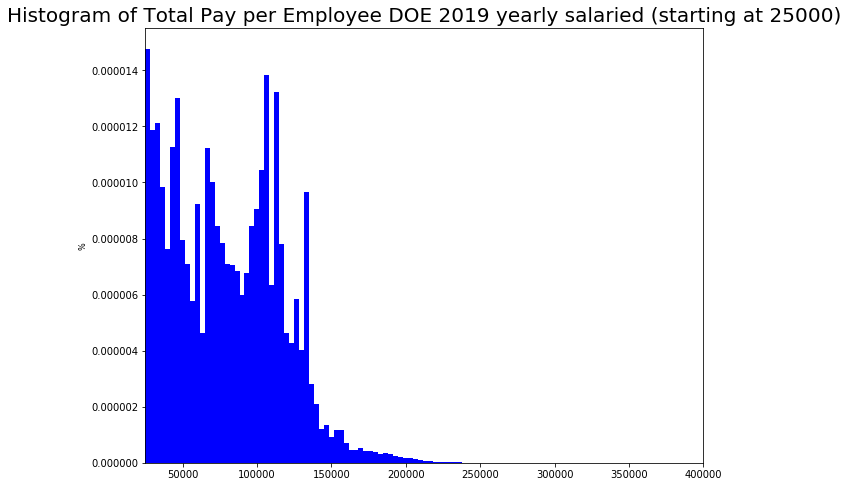

In [73]:
plt.figure(figsize=(10, 8))
plt.hist(yearly_doe2019['total_pay_all'], bins=100, density=True, color='blue')
plt.title('Histogram of Total Pay per Employee DOE 2019 yearly salaried (starting at 25000)', fontsize=20)
plt.ylabel('%', fontsize=8)
plt.xlim(25000, 400000)

(25000, 400000)

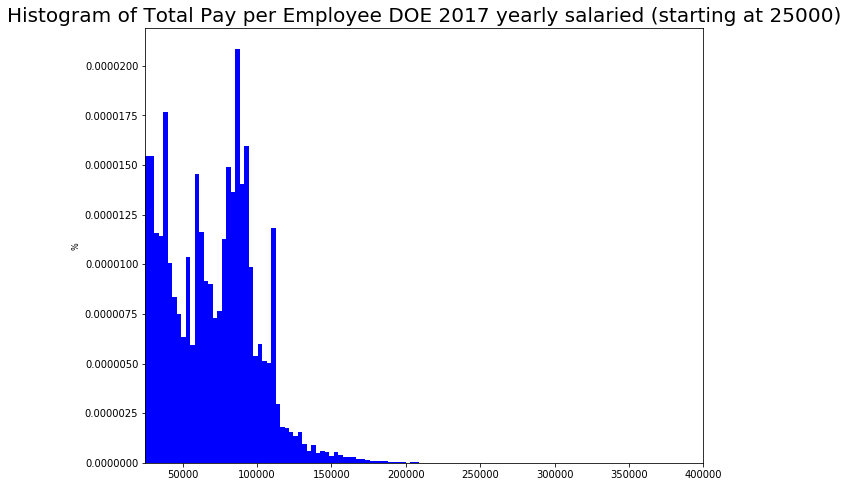

In [74]:
plt.figure(figsize=(10, 8))
plt.hist(yearly_doe2017['total_pay_all'], bins=100, density=True, color='blue')
plt.title('Histogram of Total Pay per Employee DOE 2017 yearly salaried (starting at 25000)', fontsize=20)
plt.ylabel('%', fontsize=8)
plt.xlim(25000, 400000)

In [75]:
#change in top and change in bottom

In [76]:
yearly_doe2017

,Fiscal Year,Payroll Number,Agency Name,Last Name,First Name,Mid Init,Agency Start Date,Work Location Borough,Title Description,Leave Status as of June 30,Base Salary,Pay Basis,Regular Hours,Regular Gross Paid,OT Hours,Total OT Paid,Total Other Pay,total_pay_all,total_hours
1735623,2017,NaN,DEPARTMENT OF EDUCATION ADMIN,BARNABY,OMAIDA,S,06/28/1993,MANHATTAN,PRINCIPAL ADMINISTRATIVE ASSOCIATE,ACTIVE,67608.00,per Annum,1825.00,68375.82,0.00,0.00,4071.62,72447.44,1825.00
1735648,2017,NaN,DEPARTMENT OF EDUCATION ADMIN,BROWN,ANGELLA,M,03/30/1998,BROOKLYN,PRINCIPAL ADMINISTRATIVE ASSOCIATE,ACTIVE,58607.00,per Annum,1825.00,59269.63,0.00,0.00,1683.18,60952.81,1825.00
1735673,2017,NaN,DEPARTMENT OF EDUCATION ADMIN,CRAWFORD,COLETTE,NaN,12/01/1999,MANHATTAN,PRINCIPAL ADMINISTRATIVE ASSOCIATE,ACTIVE,53831.00,per Annum,1825.00,54437.70,0.00,0.00,4063.37,58501.07,1825.00
1735698,2017,NaN,DEPARTMENT OF EDUCATION ADMIN,DUNN,MICHELLE,R,05/08/1995,MANHATTAN,PRINCIPAL ADMINISTRATIVE ASSOCIATE,ACTIVE,50858.00,per Annum,1825.00,51430.42,0.00,0.00,2355.30,53785.72,1825.00
1735723,2017,NaN,DEPARTMENT OF EDUCATION ADMIN,GALARZA,CARMEN,L,11/20/1986,MANHATTAN,PRINCIPAL ADMINISTRATIVE ASSOCIATE,ACTIVE,72370.00,per Annum,1825.00,73193.41,0.00,0.00,4063.37,77256.78,1825.00
1736171,2017,NaN,DEPARTMENT OF EDUCATION ADMIN,JOINER,DIANE,J,10/18/2015,BROOKLYN,PRINCIPAL ADMINISTRATIVE ASSOCIATE,ACTIVE,50763.00,per Annum,1825.00,51355.74,0.00,0.00,0.00,51355.74,1825.00
1736296,2017,NaN,DEPARTMENT OF EDUCATION ADMIN,MOZELLE,DENISE,M,06/30/1986,QUEENS,PRINCIPAL ADMINISTRATIVE ASSOCIATE,ACTIVE,51129.00,per Annum,1825.00,51704.33,0.00,0.00,4063.37,55767.70,1825.00
1736371,2017,NaN,DEPARTMENT OF EDUCATION ADMIN,NUNEZ,MILA,NaN,03/08/1993,MANHATTAN,CLERICAL ASSOCIATE,ACTIVE,45110.00,per Annum,1825.00,46406.46,0.00,0.00,4777.75,51184.21,1825.00
1736446,2017,NaN,DEPARTMENT OF EDUCATION ADMIN,TAM,BETTY,NaN,03/28/1988,QUEENS,CLERICAL ASSOCIATE,ACTIVE,43338.00,per Annum,1825.00,44583.14,0.00,0.00,4777.75,49360.89,1825.00
1737642,2017,NaN,DEPARTMENT OF EDUCATION ADMIN,AARON,ALANA,M,09/07/2004,MANHATTAN,ADMINISTRATIVE EDUCATION OFFICER,ACTIVE,102788.00,per Annum,1825.00,102091.58,0.00,0.00,250.00,102341.58,1825.00


In [78]:
#budget

In [79]:
expense = pd.read_csv("Expense_Budget.csv")

/Users/mariumsultan/anaconda2/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2714: DtypeWarning: Columns (0,2,4,8,12,13) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [80]:
doe_expense = expense[expense['Agency Name'].str.contains("OF ED")]

In [81]:
doe_expense2017 = doe_expense[doe_expense['Fiscal Year'] == 2017]
doe_expense2019 = doe_expense[doe_expense['Fiscal Year'] == 2019]

In [82]:
len(doe_expense2019)

5296

In [83]:
doe_expense2019.head(20)

,Publication Date,Fiscal Year,Agency Number,Agency Name,Unit Appropriation Number,Unit Appropriation Name,Budget Code Number,Budget Code Name,Object Class Number,Object Class Name,Object Code,Object Code Name,Intra-City Purchase Code,Responsibility Center Code,Responsibility Center Name,Personal Service/Other Than Personal Service Indicator,Financial Plan Savings Flag,Adopted Budget Amount,Current Modified Budget Amount,Financial Plan Amount,Adopted Budget Position,Current Modified Budget Position,Financial Plan Position,Adopted Budget - Number of Contracts,Current Modified Budget - Number of Contracts,Financial Plan - Number of Contracts
35624,20180201,2019,040,DEPARTMENT OF EDUCATION,482,CATEGORICAL PROGRAMS - OTPS,8843,REIMBURSEABLE SUPPORT-GE INST ELE/MID/HS,60,CONTRACTUAL SERVICES,607,MAINT & REP MOTOR VEH EQUIP,NaN,NaN,NaN,O,N,5500.0,5500.0,5500.0,0.0,0.0,0.0,1.0,1.0,1.0
65612,20180201,2019,040,DEPARTMENT OF EDUCATION,436,SCHOOL FACILITIES - OTPS,1737,ADA,60,CONTRACTUAL SERVICES,676,MAINT & OPER OF INFRASTRUCTURE,NaN,NaN,NaN,O,N,11212013.0,11212013.0,4671483.0,0.0,0.0,0.0,0.0,0.0,0.0
66360,20180201,2019,040,DEPARTMENT OF EDUCATION,421,CW SE INSTR & SCHL LEADERSHIP - PS,5183,TL Match for Chp 683,1,FULL TIME SALARIED,001,FULL YEAR POSITIONS,NaN,NaN,NaN,P,N,8870.0,8870.0,8870.0,0.0,0.0,0.0,0.0,0.0,0.0
86997,20180614,2019,040,DEPARTMENT OF EDUCATION,415,SCHOOL SUPPORT ORGANIZATION,2646,Field-Based Supervision and Support,4,ADDITIONAL GROSS PAY,047,OVERTIME,NaN,NaN,NaN,P,N,3238.0,3238.0,3238.0,0.0,0.0,0.0,0.0,0.0,0.0
158159,20180201,2019,040,DEPARTMENT OF EDUCATION,482,CATEGORICAL PROGRAMS - OTPS,8843,REIMBURSEABLE SUPPORT-GE INST ELE/MID/HS,60,CONTRACTUAL SERVICES,602,TELECOMMUNICATIONS MAINT,NaN,NaN,NaN,O,N,130008.0,130008.0,130008.0,0.0,0.0,0.0,7.0,7.0,7.0
158198,20180201,2019,040,DEPARTMENT OF EDUCATION,416,SCHOOL SUPPORT ORGANIZATION OTPS,2317,Field Management,30,PROPERTY AND EQUIPMENT,300,EQUIPMENT GENERAL,NaN,NaN,NaN,O,N,0.0,203688.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
158208,20180201,2019,040,DEPARTMENT OF EDUCATION,481,CATEGORICAL PROGRAMS - PS,8816,REGIONAL & CITYWIDE INST & OPS ADMIN,3,UNSALARIED,035,CUSTODIAL ALLOWANCES,NaN,NaN,NaN,P,N,765816.0,765816.0,765816.0,0.0,0.0,0.0,0.0,0.0,0.0
158210,20180201,2019,040,DEPARTMENT OF EDUCATION,402,GE INSTR & SCH LEADERSHIP - OTPS,4605,INSTRUCTIONAL SUPPORT SERVICES - HS,10,SUPPLIES AND MATERIALS,130,INSTRUCTIONL SUPPLIES-BOE ONLY,NaN,NaN,NaN,O,N,331950.0,331950.0,331950.0,0.0,0.0,0.0,0.0,0.0,0.0
158230,20180201,2019,040,DEPARTMENT OF EDUCATION,454,CENTRAL ADMINISTRATION - OTPS,1101,OFFICE OF PUPIL TRANSPORTATION,10,SUPPLIES AND MATERIALS,100,SUPPLIES + MATERIALS - GENERAL,NaN,NaN,NaN,O,N,233000.0,233000.0,233000.0,0.0,0.0,0.0,0.0,0.0,0.0
158234,20180201,2019,040,DEPARTMENT OF EDUCATION,453,CENTRAL ADMINISTRATION - PS,7413,Financial Systems and Business Ops,1,FULL TIME SALARIED,001,FULL YEAR POSITIONS,NaN,NaN,NaN,P,N,7451018.0,7451018.0,7451797.0,31.0,31.0,31.0,0.0,0.0,0.0


In [84]:
Total = doe_expense2019['Adopted Budget Amount'].sum()
print (Total)

72986567724.0


In [85]:
#too high a total, maybe repeating rows of same budget. let's guess that no 2 budgets should be exactly the same, 
#and clear out duplicates

In [86]:
len(doe_expense2019['Adopted Budget Amount'].unique())

1365

In [87]:
len(doe_expense2019['Budget Code Number'].unique())

205

In [88]:
doe_expense2019['Budget Code Number'].value_counts().head()

8888    152
8843    145
4301    109
4601    109
8848    103
Name: Budget Code Number, dtype: int64

In [89]:
doe_expense2019 = doe_expense2019.drop_duplicates(subset ="Adopted Budget Amount", inplace = False) 
doe_expense2017 = doe_expense2017.drop_duplicates(subset ="Adopted Budget Amount", inplace = False) 


In [90]:
Total = doe_expense2019['Adopted Budget Amount'].sum()
print (Total)

24237547428.0


In [91]:
#close to correct as per http://budget.council.nyc/
#Total:$23,411,024,134 in 2018

In [92]:
Total = doe_expense2017['Adopted Budget Amount'].sum()
print (Total)

21846108122.0


In [93]:
doe_expense = doe_expense.drop_duplicates(subset ="Adopted Budget Amount", inplace = False) 

In [94]:
export_csv2 = doe_expense.to_csv('expense.csv')

In [95]:
#('Object Class Name', as_index=False)['Adopted Budget Amount'].sum()

In [96]:
doe_expense2019['Object Class Name'].value_counts()

CONTRACTUAL SERVICES             433
OTHER SERVICES AND CHARGES       218
ADDITIONAL GROSS PAY             166
FULL TIME SALARIED               159
SUPPLIES AND MATERIALS           123
PROPERTY AND EQUIPMENT           111
UNSALARIED                        62
FRINGE BENEFITS                   62
FIXED & MISCELLANEOUS CHARGES     17
OTHER SALARIED                    14
Name: Object Class Name, dtype: int64

In [97]:
doe_expense2017['Object Class Name'].value_counts()

CONTRACTUAL SERVICES             431
OTHER SERVICES AND CHARGES       209
ADDITIONAL GROSS PAY             162
FULL TIME SALARIED               154
SUPPLIES AND MATERIALS           114
PROPERTY AND EQUIPMENT           104
FRINGE BENEFITS                   73
UNSALARIED                        66
FIXED & MISCELLANEOUS CHARGES     16
OTHER SALARIED                    13
AMOUNTS TO BE SCHEDULED            2
Name: Object Class Name, dtype: int64

In [98]:
df2019= doe_expense2019.groupby('Object Class Name', as_index=False)['Adopted Budget Amount'].sum().sort_values(by='Adopted Budget Amount', ascending=False)
df2017= doe_expense2017.groupby('Object Class Name', as_index=False)['Adopted Budget Amount'].sum().sort_values(by='Adopted Budget Amount', ascending=False)


In [99]:
df2019

,Object Class Name,Adopted Budget Amount
4,FULL TIME SALARIED,1.023413e+10
1,CONTRACTUAL SERVICES,6.669939e+09
3,FRINGE BENEFITS,3.725961e+09
6,OTHER SERVICES AND CHARGES,1.342301e+09
8,SUPPLIES AND MATERIALS,7.586812e+08
9,UNSALARIED,7.063871e+08
0,ADDITIONAL GROSS PAY,4.563331e+08
7,PROPERTY AND EQUIPMENT,2.104639e+08
2,FIXED & MISCELLANEOUS CHARGES,1.318101e+08
5,OTHER SALARIED,1.544496e+06


In [100]:
df2017.rename(columns = {'Adopted Budget Amount':'Adopted Budget Amount 2017'}, inplace = True)

In [101]:
df2019.rename(columns = {'Adopted Budget Amount':'Adopted Budget Amount 2019'}, inplace = True)

In [102]:
df = df2017.merge(df2019)

In [103]:
df

,Object Class Name,Adopted Budget Amount 2017,Adopted Budget Amount 2019
0,FULL TIME SALARIED,9.060527e+09,1.023413e+10
1,CONTRACTUAL SERVICES,5.432354e+09,6.669939e+09
2,FRINGE BENEFITS,3.494537e+09,3.725961e+09
3,OTHER SERVICES AND CHARGES,1.338894e+09,1.342301e+09
4,UNSALARIED,9.534447e+08,7.063871e+08
5,SUPPLIES AND MATERIALS,6.845846e+08,7.586812e+08
6,ADDITIONAL GROSS PAY,4.472920e+08,4.563331e+08
7,FIXED & MISCELLANEOUS CHARGES,2.120357e+08,1.318101e+08
8,PROPERTY AND EQUIPMENT,2.089611e+08,2.104639e+08
9,OTHER SALARIED,1.485292e+06,1.544496e+06


In [104]:
dfs= df.head()

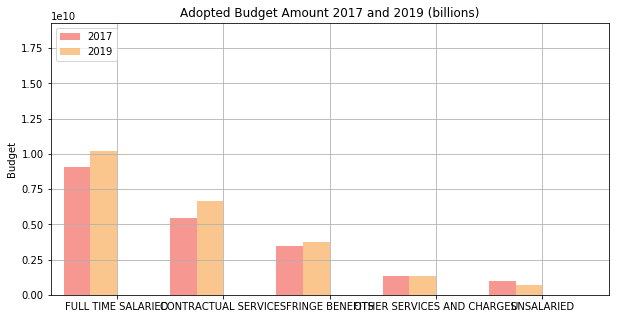

In [105]:
# Setting the positions and width for the bars
pos = list(range(len(dfs['Adopted Budget Amount 2017']))) 
width = 0.25 
    
# Plotting the bars
fig, ax = plt.subplots(figsize=(10,5))

# Create a bar with pre_score data,
# in position pos,
plt.bar(pos, 
        dfs['Adopted Budget Amount 2017'], 
        # of width
        width, 
        # with alpha 0.5
        alpha=0.5, 
        # with color
        color='#EE3224', 
        # with label the first value in first_name
        label=dfs['Object Class Name'][0]) 

# Create a bar with mid_score data,
# in position pos + some width buffer,
plt.bar([p + width for p in pos], 
        dfs['Adopted Budget Amount 2019'],
        # of width
        width, 
        # with alpha 0.5
        alpha=0.5, 
        # with color
        color='#F78F1E', 
        # with label the second value 
        label=dfs['Object Class Name'][1])  

# Set the y axis label
ax.set_ylabel('Budget')

# Set the chart's title
ax.set_title('Adopted Budget Amount 2017 and 2019 (billions)')

# Set the position of the x ticks
ax.set_xticks([p + 1.5 * width for p in pos])

# Set the labels for the x ticks
ax.set_xticklabels(df['Object Class Name'])

# Setting the x-axis and y-axis limits
plt.xlim(min(pos)-width, max(pos)+width*4)
plt.ylim([0, max(dfs['Adopted Budget Amount 2017'] + df['Adopted Budget Amount 2019'])] )

# Adding the legend and showing the plot
plt.legend(['2017', '2019'], loc='upper left')
plt.grid()
plt.show()

In [106]:
df

,Object Class Name,Adopted Budget Amount 2017,Adopted Budget Amount 2019
0,FULL TIME SALARIED,9.060527e+09,1.023413e+10
1,CONTRACTUAL SERVICES,5.432354e+09,6.669939e+09
2,FRINGE BENEFITS,3.494537e+09,3.725961e+09
3,OTHER SERVICES AND CHARGES,1.338894e+09,1.342301e+09
4,UNSALARIED,9.534447e+08,7.063871e+08
5,SUPPLIES AND MATERIALS,6.845846e+08,7.586812e+08
6,ADDITIONAL GROSS PAY,4.472920e+08,4.563331e+08
7,FIXED & MISCELLANEOUS CHARGES,2.120357e+08,1.318101e+08
8,PROPERTY AND EQUIPMENT,2.089611e+08,2.104639e+08
9,OTHER SALARIED,1.485292e+06,1.544496e+06


In [107]:
df['delta']= df['Adopted Budget Amount 2019']-df['Adopted Budget Amount 2017']

In [108]:
df

,Object Class Name,Adopted Budget Amount 2017,Adopted Budget Amount 2019,delta
0,FULL TIME SALARIED,9.060527e+09,1.023413e+10,1.173601e+09
1,CONTRACTUAL SERVICES,5.432354e+09,6.669939e+09,1.237585e+09
2,FRINGE BENEFITS,3.494537e+09,3.725961e+09,2.314237e+08
3,OTHER SERVICES AND CHARGES,1.338894e+09,1.342301e+09,3.406919e+06
4,UNSALARIED,9.534447e+08,7.063871e+08,-2.470576e+08
5,SUPPLIES AND MATERIALS,6.845846e+08,7.586812e+08,7.409661e+07
6,ADDITIONAL GROSS PAY,4.472920e+08,4.563331e+08,9.041109e+06
7,FIXED & MISCELLANEOUS CHARGES,2.120357e+08,1.318101e+08,-8.022566e+07
8,PROPERTY AND EQUIPMENT,2.089611e+08,2.104639e+08,1.502817e+06
9,OTHER SALARIED,1.485292e+06,1.544496e+06,5.920400e+04


In [109]:
bugetcha = df.to_csv('budget_changes.csv')

In [110]:
1.333380e+07/(1.173601e+09+ 9.041109e+06 +5.920400e+04) *100

#1.1% of salary increase is going to top 500

1.1274021473923908

In [111]:
(500/149491) *100

0

In [112]:
#these dataframes do not have small values cleared
yearly_doe2019= doe2019[doe2019['Pay Basis']=='per Annum']

yearly_doe2017= doe2017[doe2017['Pay Basis']=='per Annum']

In [113]:
x5 = yearly_doe2019['total_pay_all'].sum()
y5 = yearly_doe2017['total_pay_all'].sum()
delta_sum = x5-y5
print delta_sum

2040691984.540001


In [114]:
x5 = yearly_doe2019['Base Salary'].sum()
y5 = yearly_doe2017['Base Salary'].sum()
delta_sum = x5-y5
print delta_sum

1815419544.0


In [115]:
1.173601e+09+ 9.041109e+06 +5.920400e+04

1182701313.0

In [116]:
#budget for full time salaried has gone up 1182701313.0 (1bill)
#total pay for full time salried has gone up 2040691984 (2bill)
#base pay for full time salried has gone up 1,815,419,544 
#added 12,161 salaried empolyees
#that is 96,505 per empolyee
#mean pay per employee, for empolyees making above 25000, has gone up 9761, and is 79941

In [117]:
#budget for contractual services has gone up 1,237,585,000


In [118]:
#gps?? - further investigation

In [119]:
doe_gps = doe_expense[doe_expense['Budget Code Name'].str.contains("TRANS")]

In [120]:
doe_gps = doe_gps[doe_gps['Object Class Name'].str.contains("CONTRA")]

In [121]:
doe_gps = doe_gps[['Fiscal Year', 'Adopted Budget Amount']]

In [122]:
doe_gps

,Fiscal Year,Adopted Budget Amount
773,2017,500000.0
950,2017,118244929.0
79689,2018,98244929.0
173210,2019,99714726.0
255137,2020,107343315.0
364099,2021,105073438.0


In [123]:
doe_gps = doe_gps.drop_duplicates(subset ="Adopted Budget Amount", inplace = False) 


In [124]:
doe_gps

,Fiscal Year,Adopted Budget Amount
773,2017,500000.0
950,2017,118244929.0
79689,2018,98244929.0
173210,2019,99714726.0
255137,2020,107343315.0
364099,2021,105073438.0


In [125]:
doe_gps= doe_gps.groupby('Fiscal Year', as_index=False)['Adopted Budget Amount'].sum()

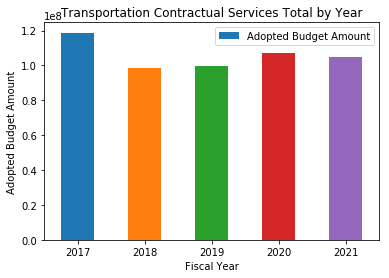

In [126]:
ax = doe_gps.plot.bar(x='Fiscal Year', y='Adopted Budget Amount', rot=0)
ax.set_title('Transportation Contractual Services Total by Year')
ax.set_ylabel('Adopted Budget Amount')
ax